# WORD2VEC

Session 3 - Exercice 2

# Load Packages

__Load the necessary packages before starting your work__

In [1]:
# Load file from drive
from google.colab import drive
import os

# Classic data manipulation libraries
import re
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Visualization libraries
import seaborn as sns

# NLP Libraries
import gensim
from gensim.test.utils import get_tmpfile
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Define parameters for notebook import
%matplotlib inline
pd.set_option('display.max_columns', 500)

# Load Data

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
os.chdir("/content/drive/MyDrive/NLP_Capgemini_2021/NLP @ X_HEC - 2K21/Cours 3 - Embedding part 1/")

__1- Get the data and look at its shape__

In [7]:
path_to_your_dataset = 'data/clean_text_scrapped_data_2021.csv'

reviews = pd.read_csv(path_to_your_dataset,
                      low_memory=False,
                      parse_dates=['rating_date', 'diner_date']
                     )

In [8]:
# Take only a limited number of our reviews to increase speed / reduce process time
reviews = reviews.sample(30000)

__2- Look into few lines of your data and see variables types__

In [9]:
reviews.shape

(30000, 20)

In [10]:
reviews.head()

,Unnamed: 0,0,answer_text,content,diner_date,id_comment,id_resto,other_ratings_category,other_ratings_value,rating,rating_date,resto,resto_url,reviewer_info_sup,reviewer_origin,reviewer_pseudo,title,url,Day_of_week,clean_content
157539,520048,NaN,"['As we explained to your colleague, we are re...","[""Used to go all the time, and I would still d...",2017-04-01,g186338-d2627296-r477910197,g186338-d2627296,[],[],1.0,2017-04-22,La_Patagonia,/Restaurant_Review-g186338-d2627296-Reviews-La...,"[['pencil-paper', '9'], ['thumbs-up', '7']]",['London'],CaifasLondon,I used to love it,https://www.tripadvisor.com/ShowUserReviews-g1...,5,"['``', 'used', 'go', 'time', 'still', ""n't"", '..."
213199,266965,NaN,"['Dear JPY,', 'I am happy to hear that you had...",['We had a relaxing lunch at Ting. I have to m...,2020-10-01,g186338-d6615954-r773214958,g186338-d6615954,[],[],5.0,2020-10-05,Ting_Restaurant_Lounge,/Restaurant_Review-g186338-d6615954-Reviews-Ti...,"[['pencil-paper', '3']]","['London, United Kingdom']",ZefNt,Great view and service,https://www.tripadvisor.com/ShowUserReviews-g1...,0,"[""'we"", 'relaxing', 'lunch', 'ting', 'mentinon..."
51573,996092,NaN,"['Dear Janet, ', 'Thank you for your feedback ...",['Set in a couple of old houses that have been...,2014-06-01,g186338-d1205582-r208754550,g186338-d1205582,"['Value', 'Atmosphere', 'Service', 'Food']","['40', '40', '50', '50']",5.0,2014-06-03,Trishna,/Restaurant_Review-g186338-d1205582-Reviews-Tr...,"[['pencil-paper', '24'], ['thumbs-up', '7']]","['London, United Kingdom']",Janet M,A great place to eat,https://www.tripadvisor.com/ShowUserReviews-g1...,1,"[""'set"", 'couple', 'old', 'house', 'knocked', ..."
115795,412768,NaN,"['Dear Chuna7,', 'We cannot thank you enough f...",['Had breakfast there with my mum who was stay...,2016-12-01,g186338-d2006550-r443398340,g186338-d2006550,"['Value', 'Service', 'Food']","['40', '50', '40']",4.0,2016-12-10,The_Rafkins_Lounge_Bar_Cafe_Restaurant,/Restaurant_Review-g186338-d2006550-Reviews-Th...,"[['pencil-paper', '13']]","['London, United Kingdom']",Mbam7,Breakfast,https://www.tripadvisor.com/ShowUserReviews-g1...,5,"[""'had"", 'breakfast', 'mum', 'staying', 'hotel..."
305733,597135,NaN,['Thankyou for taking the time to review my re...,['A fantastic lunch here earlier this week. Cl...,2016-07-01,g186338-d8286686-r398788003,g186338-d8286686,"['Value', 'Service', 'Food']","['40', '40', '40']",4.0,2016-07-29,Pure_Cyprus,/Restaurant_Review-g186338-d8286686-Reviews-Pu...,"[['pencil-paper', '1'], ['thumbs-up', '1']]",[],dlipscombe,surprisingly very very good,https://www.tripadvisor.com/ShowUserReviews-g1...,4,"['fantastic', 'lunch', 'earlier', 'week', 'cle..."


__3- If there is something not normal to you, correct it; otherwise going on to the next section__

In [11]:
# code here

__4- Get the reviews of Capgemini to begin__

_(later you could try with you own dataset or with the full students data)_


In [12]:
# code here

__5- Try to see if there's not something else to do__

In [13]:
# code here

__6- Create your corpus (it is a list of the reviews)__

In [15]:
corpus = reviews.clean_content.map(lambda review: ast.literal_eval(review)).tolist()

In [16]:
def finalize_cleaning(reviews):
    reviews = [re.sub(r"\`+", "", word) for word in reviews]
    reviews = [re.sub(r"\.+", ".", word) for word in reviews]
    reviews = [re.sub(r"\.\w", "", word) for word in reviews]
    reviews = [re.sub(r"\'", ".", word) for word in reviews]
    reviews = [word for word in reviews if len(word)>1]
    return reviews

In [17]:
corpus = list(map(lambda review: finalize_cleaning(review), corpus))

In [ ]:
corpus

[['delicious',
  'delicious',
  'delicious',
  'n.t',
  'stop',
  'eating',
  'highly',
  'recommend',
  'place',
  'anyone',
  'around',
  'fancy',
  'try',
  'real',
  'turkish',
  'delight',
  '..'],
 ['.food',
  'excellent',
  'great',
  'choice',
  'menu',
  'ideal',
  'couple',
  'friend',
  'family',
  'celebration',
  'etc',
  'etc',
  'etc'],
 ['.chobham',
  'fair',
  'way',
  'sea',
  'said',
  'tad',
  'dish',
  'enjoy',
  'can',
  'sure',
  'surely',
  'frozen',
  'som',
  'point',
  'bad',
  'dish',
  'something',
  'suit',
  'fish',
  'taste',
  'simple',
  'exotic',
  '.service',
  'fine',
  'although',
  'waiter',
  'lean',
  'presenting',
  'clearing',
  'ideal',
  '.would',
  'return',
  'area',
  'food',
  'fine',
  'excellent',
  'parking',
  'facility',
  'build',
  'area',
  'good',
  'family',
  'dining'],
 ['.service',
  'second',
  'none',
  'attentive',
  'staff',
  'welcoming',
  'atmosphere',
  'food',
  'overall',
  'nice',
  'apart',
  'sea',
  'bass',
  '

# Building your own Word2Vec

__1- Load gensim package__

*Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora.*

In [18]:
# code here (if you forgot to load the package at the beginning)

__2- Create a temporary file by giving an extension and make sure you add ".model" as extension__

In [19]:
path = get_tmpfile("word2vec.model")

__3- Instantiate your word2vec model__

*This module implements the word2vec family of algorithms: skip-gram and CBOW models.*

**window** = Maximum distance between the current and predicted word within a sentence.

**min_count** = Ignores all words with total frequency lower than this.

**workers** = Use these many worker threads to train the model (=faster training with multicore machines).

**seed** = Seed for the random number generator.

In [20]:
model = gensim.models.Word2Vec(size=300, window=3, min_count=5, workers=4, seed=1, iter=50)

__4- Define the vocabulary of your model__

Build vocabulary from a sequence of sentences.

In [21]:
model.build_vocab(corpus[:3000])

__5- Train your word2vec model__

In [22]:
model.train(corpus[:3000], total_examples=model.corpus_count, epochs=model.iter)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(5418985, 6760250)

__6- Save your word2vec model; give the same path as in your temporary file__

In [23]:
model.save("word2vec.model")

__Congratulations, you've built your first word2vec model !!!__

__7- Try to repeat the previous steps and change the values of hyperparameters from the model instatiation step__

In [ ]:
# code here

__8- Load the model you've saved (from the same path as saving path)__

In [ ]:
model = gensim.models.Word2Vec.load("word2vec.model")

__9- Get the weight vector of a word; this is the vector (of numerical) representation of your word__

In [ ]:
list(model.wv["beer"])

[0.36563358,
 -0.94101906,
 0.22080368,
 0.37681988,
 0.21376194,
 0.8292094,
 -0.5576386,
 -0.7983424,
 0.50114363,
 -0.20290627,
 -0.4404666,
 0.06081915,
 -0.107472345,
 0.1849158,
 0.24296926,
 1.0990746,
 0.06273171,
 0.3894475,
 -0.23381002,
 -0.17172149,
 -0.50662684,
 0.19519685,
 0.28236333,
 0.27857226,
 0.75182945,
 0.42007986,
 -0.49349687,
 0.43567464,
 0.35833025,
 -0.25048372,
 0.72826904,
 -0.06883731,
 -0.52191603,
 0.24453717,
 -0.2743189,
 -0.12699649,
 -0.3132389,
 0.3426362,
 -1.6274422,
 -0.54485965,
 1.651906,
 -0.17310748,
 -0.21204764,
 0.21346454,
 -0.42674077,
 -0.254915,
 0.21088083,
 1.1629548,
 -0.41014254,
 -0.45172057,
 -0.053041972,
 -1.1882101,
 0.74678576,
 0.39788657,
 -0.2356393,
 0.11153903,
 1.4261155,
 0.38882557,
 0.5905483,
 -1.5990295,
 0.2505438,
 2.0772038,
 -0.7877526,
 -0.2740315,
 0.027306177,
 0.024436837,
 -1.2825315,
 1.2075057,
 0.43462372,
 -0.33642575,
 0.53114915,
 -0.6703942,
 -0.24653924,
 -0.05772549,
 1.1732951,
 0.014375925,
 

__10- Get the similarity of some words from your laoded model__

In [ ]:
model.wv.most_similar("dessert", topn=10)

[('desert', 0.5187751054763794),
 ('sorbet', 0.5175789594650269),
 ('berry', 0.49531275033950806),
 ('raspberry', 0.4792591333389282),
 ('follow', 0.477971613407135),
 ('chocolate', 0.4714297652244568),
 ('tart', 0.4642946124076843),
 ('platter', 0.46305662393569946),
 ('cheesecake', 0.44704052805900574),
 ('custard', 0.42268848419189453)]

# Create Word Embedding of Words

---



__1- Get the embedding matrix of your corpus__

In [ ]:
embedding_matrix = dict()

for word in model.wv.vocab.keys():
    embedding_matrix[word] = list(model.wv[word]) # get numpy vector of a word (wv = word vector)

__2- Transform it to a pandas DataFrame and look into few lines of you embedding matrix__

In [ ]:
embedding_matrix = pd.DataFrame(embedding_matrix)

In [ ]:
 embedding_matrix.head()

,delicious,n.t,stop,eating,highly,recommend,place,anyone,around,fancy,try,real,turkish,delight,..,.food,excellent,great,choice,menu,ideal,couple,friend,family,celebration,etc,fair,way,sea,said,tad,dish,enjoy,can,sure,surely,frozen,point,bad,something,suit,fish,taste,simple,exotic,.service,fine,although,waiter,clearing,.would,return,area,food,parking,facility,good,dining,second,none,attentive,staff,welcoming,atmosphere,overall,nice,apart,bass,little,bland,otherwise,enjoyable,dinner,.we,met,saturday,get,together,drink,heading,previously,long,bar,service,agreed,meeting,idea,arrived,managed,find,table,outside,front,hotel,setting,.unfortunately,began,go,downhill,server,came,asked,order,seemed,extremely,surprised,going,give,different,wandered,paper,write,husband,lemon,ice,wine,onto,twice,clean,much,better,later,joined,amongst,tonic,never,especially,already,added,also,found,surprising,nibble,given,ordered,nut,kale,chip,olive,unfortunately,stale,sent,back,happy,.when,bill,full,charge,done,past,paying,premium,price,one,match,case,hurry,wife,dined,monday,evening,moment,walked,made,feel,special,seven,course,taster,.s,allergy,taken,account,superb,informative,particularly,liked,spoon,fed,allowed,form,opinion,sommelier,gave,extensive,knowledge,got,variety,right,bang,country,two,almost,definitely,thought,truly,memorable,like,repeat,.not,impressive,chinese,style,breakfast,chose,day,authentic,maybe,choose,buffet,host,warm,welcome,attentiveness,encountered,lovely,theme,however,afternoon,tea,lot,venue,sandwich,bit,odd,mix,cake,looked,beautiful,care,disappointing,chocolate,cup,whipped,cream,strange,scone,fresh,jam,flavour,left,quite,nicely,take,away,need,work,combination,master,class,...,version,trio,knowledgable,flexible,30th,syrup,bloody,.recently,.once,shouting,training,introduced,pm,aunt,.happy,milk,crammed,majority,custom,nigiri,impress,celebrated,matched,langans,liver,arranged,successful,quiz,2017,quarter,york,planned,carluccio,scottish,expert,adequate,title,plentiful,cardboard,result,wrap,delicate,xmas,hole,unpleasant,couldn\.t,16,skin,ensured,companion,ta,travelled,september,wednesday,.booked,casino,2.,hake,berry,writing,blend,harry,.price,sometimes,greeting,personable,site,yellowtail,focus,recall,battered,likely,prefer,soy,include,milanese,communication,pity,loin,jelly,royal,kebab,yogurt,landlord,mouthful,struggling,sardine,finest,oak,.ok,cracker,unable,kick,classy,irish,anticipated,closing,measure,monmouth,instantly,expertly,hollywood,parked,wahaca,tortilla,singing,completed,specific,malcolm,.ps,died,replied,dinning,supervisor,caught,ship,sky,couldnt,delicately,mediterranean,intended,parent,cash,cahoot,quieter,atrocious,layout,typically,answered,calm,golden,genuine,worried,selecting,unprofessional,lead,calf,dream,garnish,appeal,faulted,deposit,hadn,earth,wearing,korean,hamper,dead,advertised,wallet,.an,disinterested,reccomend,camera,language,hall,ramsay,guitar,terrific,locally,thumb,cutlet,ring,stock,originally,england,desperate,crust,appalling,quaint,practically,lockdown,younger,gymkhana,wash,poorly,earl,marinated,hawksmoor,reminded,anytime,serious,achieve,pocket,hrc,raise,hell,pace,shank,rump,shaka,zulu,destination,understaffed,score,lie,excessive,wave,ear,regent,uninterested,.popped,fall,news,displayed,liverpool,appealing,kicked,wheelchair,jack,named,potion,firm,receptionist,scott,flash,google,schnitzel,stressed,delivers,blanket,distinctly,opt,frites,vacate,ivy,singapore,clam,traffic,festival,letting,shisha,arrogance,hardrock,vardo,banc,mandaloun,mezze,gallery,£70,swan,simpson,sizzler,coke,exemplary,gym,prince,push,bayleaf,spare
0,-0.528676,-0.551785,-0.240014,-0.120394,1.129409,0.329545,1.177953,1.154704,0.000388,0.241366,-0.779045,0.192415,-0.041513,-0.025081,0.525311,1.323700,-0.348512,0.154909,1.028004,0.497923,-0.171070,-0.210653,-0.617788,-0.677960,-0.110757,0.200646,0.373756,0.999451,-0.094054,0.191504,-0.113873,0.298608,-0.302213,0.982042,0.686282,0.401950,-0.360324,-0.770045,0.412776,-0.224305,-0.226647,-0.765632,0.384296,0.

In [ ]:
embedding_matrix.shape

(300, 2922)

# Discovering Knowledge With Embedding Matrix

## 1- Dimension Reduction (PCA)


How to represent these word vectors in a two-dimensional space using matplotlib and PCA? It is a method to handle large datasets of high-dimensional data for visualization.

__1.1- Instantiate a PCA with whatever number of components that you want__

In [ ]:
pca = PCA(n_components=3)

__1.2- Fit your PCA to your data; make sure your words are the rows of your data__

In [ ]:
pca.fit(embedding_matrix.T)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

__1.3- Get the explained variance ratio of your PCA__

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.07968419, 0.13453919, 0.18016096])

__1.4- Apply your PCA to your data__

In [ ]:
pca_data = pd.DataFrame(pca.transform(embedding_matrix.T))
pca_data.columns = ["PC1", "PC2", "PC3"]

__1.5- Get a look (a plot) of the PCA on your data__

In [ ]:
pca_data.head()

,PC1,PC2,PC3
0,3.031815,-2.631446,0.977913
1,-0.805869,1.207709,1.316339
2,-2.287691,-0.040913,-0.098141
3,-0.472467,0.065296,-1.030074
4,-0.233106,-3.017057,-0.066652


In [ ]:
pca_data.shape

(2922, 3)

In [ ]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


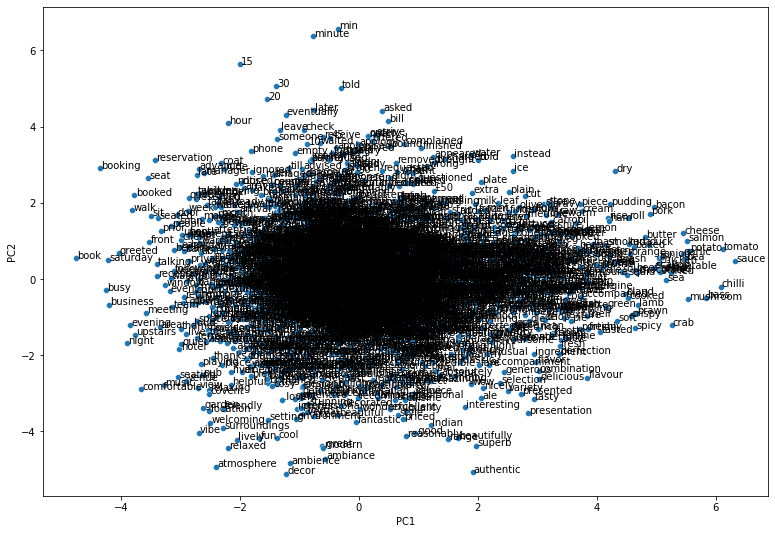

In [ ]:
plt.figure(figsize = (13,9))

sns.scatterplot(pca_data.PC1, pca_data.PC2)
label_point(pca_data.PC1, pca_data.PC2, pd.Series(embedding_matrix.columns), plt.gca())

## 2- Dimension reduction (T-SNE)

t-SNE is an algorithm for dimensionality reduction that is great for visualising high-dimensional data. t-SNE stands for t-distributed Stochastic Neighbor Embedding.

__2.1- Instantiate your TSNE method__

In [ ]:
X_embedded = TSNE(n_components=2, perplexity=5, learning_rate=300).fit_transform(embedding_matrix.T)

__2.2- Fit your data and transform it__

In [ ]:
X_embedded = pd.DataFrame(X_embedded)
X_embedded.columns = ["Dimension1", "Dimension2"]

__2.3- Get a look on your TSNE transformation__

In [ ]:
X_embedded.head()

,Dimension1,Dimension2
0,-52.326374,33.033695
1,34.621738,14.449872
2,21.362978,-23.178329
3,27.117960,-23.972101
4,-3.337943,-26.069199


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


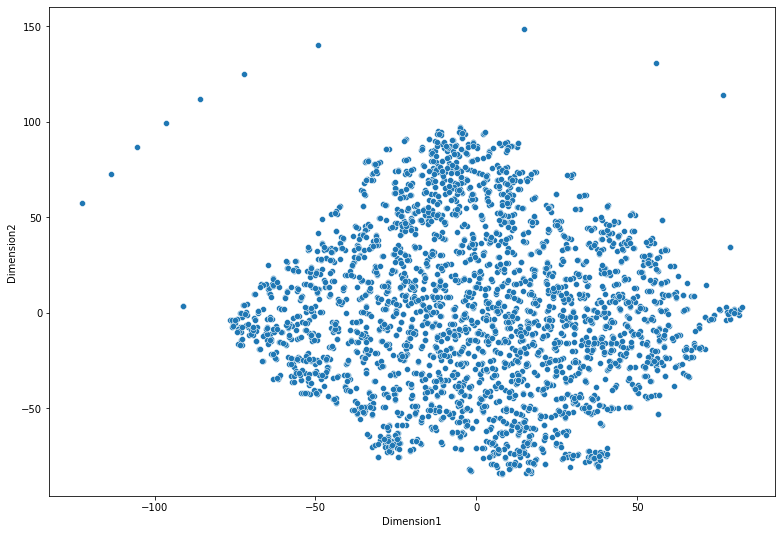

In [ ]:
plt.figure(figsize = (13,9))

sns.scatterplot(X_embedded.Dimension1, X_embedded.Dimension2)
#label_point(X_embedded.Dimension1, X_embedded.Dimension2, pd.Series(embedding_matrix.columns), plt.gca())

# Generating your Reviews Embedding Matrix

__1- For each reviews, agregate (average) the weight vector of terms it comprises__

In [ ]:
vectors = []
for review_content in corpus:
    review_vector = []
    for word in review_content:
        try:
            review_vector.append(list(model.wv[word]))
        except KeyError:
            pass            
    vectors.append([sum(i) for i in zip(*review_vector)])

In [ ]:
review_embedding = pd.DataFrame(vectors)

In [ ]:
review_embedding = review_embedding/300

In [ ]:
review_embedding.columns = ["Dimension_"+str(i) for i in range(300)]

In [ ]:
reviews = reviews.reset_index()

In [ ]:
concat_reviews = pd.concat([reviews, review_embedding], axis=1)

__2- There you go, you build your first word2vec embedding matrix for further analysis__

In [ ]:
concat_reviews.head()

,index,Unnamed: 0,0,answer_text,content,diner_date,id_comment,id_resto,other_ratings_category,other_ratings_value,rating,rating_date,resto,resto_url,reviewer_info_sup,reviewer_origin,reviewer_pseudo,title,url,Day_of_week,clean_content,Dimension_0,Dimension_1,Dimension_2,Dimension_3,Dimension_4,Dimension_5,Dimension_6,Dimension_7,Dimension_8,Dimension_9,Dimension_10,Dimension_11,Dimension_12,Dimension_13,Dimension_14,Dimension_15,Dimension_16,Dimension_17,Dimension_18,Dimension_19,Dimension_20,Dimension_21,Dimension_22,Dimension_23,Dimension_24,Dimension_25,Dimension_26,Dimension_27,Dimension_28,Dimension_29,Dimension_30,Dimension_31,Dimension_32,Dimension_33,Dimension_34,Dimension_35,Dimension_36,Dimension_37,Dimension_38,Dimension_39,Dimension_40,Dimension_41,Dimension_42,Dimension_43,Dimension_44,Dimension_45,Dimension_46,Dimension_47,Dimension_48,Dimension_49,Dimension_50,Dimension_51,Dimension_52,Dimension_53,Dimension_54,Dimension_55,Dimension_56,Dimension_57,Dimension_58,Dimension_59,Dimension_60,Dimension_61,Dimension_62,Dimension_63,Dimension_64,Dimension_65,Dimension_66,Dimension_67,Dimension_68,Dimension_69,Dimension_70,Dimension_71,Dimension_72,Dimension_73,Dimension_74,Dimension_75,Dimension_76,Dimension_77,Dimension_78,Dimension_79,Dimension_80,Dimension_81,Dimension_82,Dimension_83,Dimension_84,Dimension_85,Dimension_86,Dimension_87,Dimension_88,Dimension_89,Dimension_90,Dimension_91,Dimension_92,Dimension_93,Dimension_94,Dimension_95,Dimension_96,Dimension_97,Dimension_98,Dimension_99,Dimension_100,Dimension_101,Dimension_102,Dimension_103,Dimension_104,Dimension_105,Dimension_106,Dimension_107,Dimension_108,Dimension_109,Dimension_110,Dimension_111,Dimension_112,Dimension_113,Dimension_114,Dimension_115,Dimension_116,Dimension_117,Dimension_118,Dimension_119,Dimension_120,Dimension_121,Dimension_122,Dimension_123,Dimension_124,Dimension_125,Dimension_126,Dimension_127,Dimension_128,Dimension_129,Dimension_130,Dimension_131,Dimension_132,Dimension_133,Dimension_134,Dimension_135,Dimension_136,Dimension_137,Dimension_138,Dimension_139,Dimension_140,Dimension_141,Dimension_142,Dimension_143,Dimension_144,Dimension_145,Dimension_146,Dimension_147,Dimension_148,Dimension_149,Dimension_150,Dimension_151,Dimension_152,Dimension_153,Dimension_154,Dimension_155,Dimension_156,Dimension_157,Dimension_158,Dimension_159,Dimension_160,Dimension_161,Dimension_162,Dimension_163,Dimension_164,Dimension_165,Dimension_166,Dimension_167,Dimension_168,Dimension_169,Dimension_170,Dimension_171,Dimension_172,Dimension_173,Dimension_174,Dimension_175,Dimension_176,Dimension_177,Dimension_178,Dimension_179,Dimension_180,Dimension_181,Dimension_182,Dimension_183,Dimension_184,Dimension_185,Dimension_186,Dimension_187,Dimension_188,Dimension_189,Dimension_190,Dimension_191,Dimension_192,Dimension_193,Dimension_194,Dimension_195,Dimension_196,Dimension_197,Dimension_198,Dimension_199,Dimension_200,Dimension_201,Dimension_202,Dimension_203,Dimension_204,Dimension_205,Dimension_206,Dimension_207,Dimension_208,Dimension_209,Dimension_210,Dimension_211,Dimension_212,Dimension_213,Dimension_214,Dimension_215,Dimension_216,Dimension_217,Dimension_218,Dimension_219,Dimension_220,Dimension_221,Dimension_222,Dimension_223,Dimension_224,Dimension_225,Dimension_226,Dimension_227,Dimension_228,Dimension_229,Dimension_230,Dimension_231,Dimension_232,Dimension_233,Dimension_234,Dimension_235,Dimension_236,Dimension_237,Dimension_238,Dimension_239,Dimension_240,Dimension_241,Dimension_242,Dimension_243,Dimension_244,Dimension_245,Dimension_246,Dimension_247,Dimension_248,Dimension_249,Dimension_250,Dimension_251,Dimension_252,Dimension_253,Dimension_254,Dimension_255,Dimension_256,Dimension_257,Dimension_258,Dimension_259,Dimension_260,Dimension_261,Dimension_262,Dimension_263,Dimension_264,Dimension_265,Dimension_266,Dimension_267,Dimension_268,Dimension_269,Dimension_270,Dimension_271,Dimension_272,Dimension_273,Dimension_274,Dimension_275,Dimension_2

__The End!__